In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv('Social_Network_Ads.csv')

In [3]:
X = dataset.iloc[:,1:-1].values
y = dataset.iloc[:,-1].values

In [4]:
from sklearn.preprocessing import LabelEncoder
labelenc_X = LabelEncoder()
X[:,0] = labelenc_X.fit_transform(X[:,0])

In [5]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(categorical_features = [0])
X = ohe.fit_transform(X).toarray()
X = X[:,1:]

In [6]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 0)

C:\Users\Karthikeyan Sankar\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [7]:
from sklearn.preprocessing import StandardScaler
std_x =StandardScaler()
X_train = std_x.fit_transform(X_train)
X_test = std_x.transform(X_test)

In [15]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion='entropy')
classifier.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [17]:
y_pred = classifier.predict(X_test)

In [18]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[53  5]
 [ 3 19]]


In [19]:
print(((cm[0][0]+cm[1][1])/(cm[0][0]+cm[0][1]+cm[1][0]+cm[1][1]))*100,"% Accurate Af")

90.0 % Accurate Af


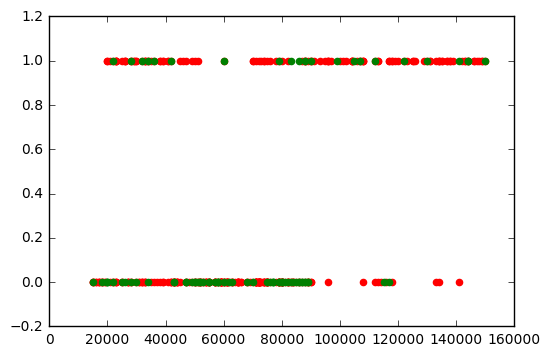

In [20]:
from matplotlib.colors import ListedColormap
X_chart = std_x.inverse_transform(X_train)
plt.scatter(X_chart[:,2],y_train,color='red')
X_chart = std_x.inverse_transform(X_test)
plt.scatter(X_chart[:,2],y_test, color='green')
plt.show()